# Image Classification

In [1]:
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns

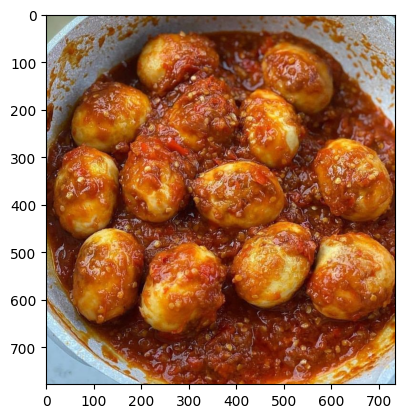

In [2]:
# Read Images
img = mpimg.imread('Dataset/Train/egg ballado/4c2cd42040c108f95bb2484ee0b00590.jpg')

# Output Images
plt.imshow(img)

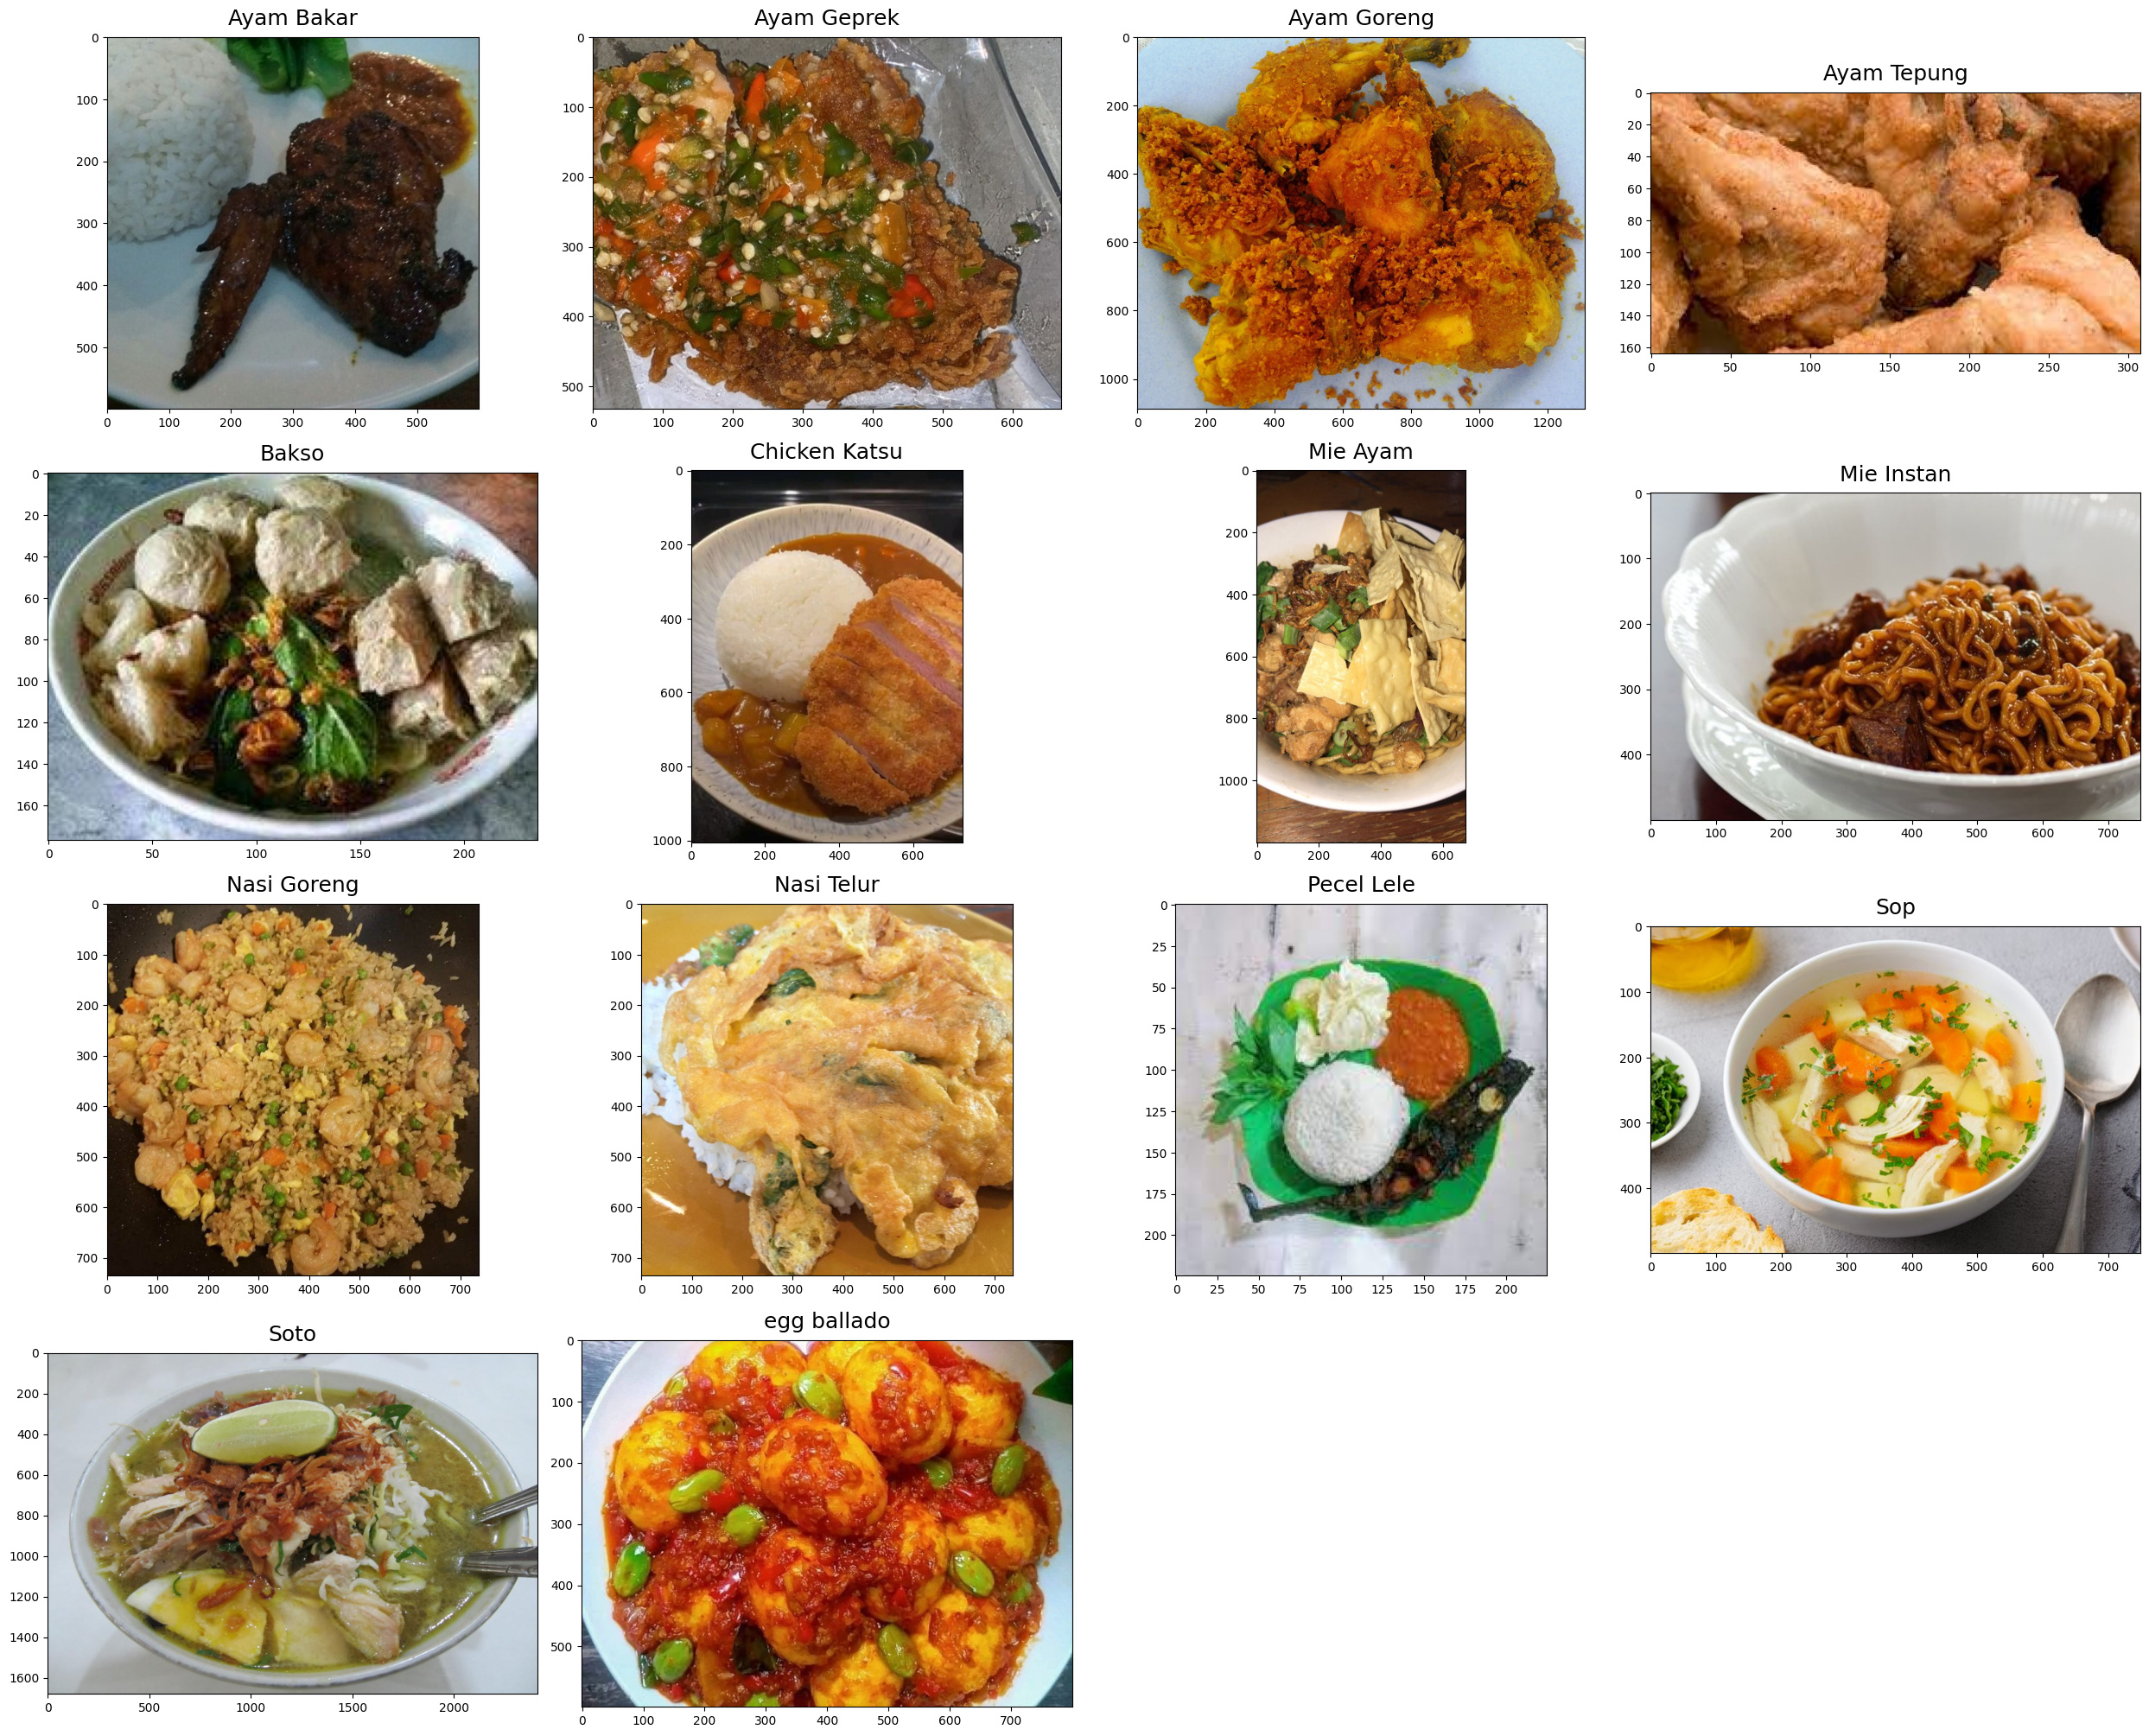

In [3]:
train_dir = "Dataset\Train"
test_dir = "Dataset\Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.4,
                                                                horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical')

Found 2673 images belonging to 14 classes.
Found 872 images belonging to 14 classes.


Pakai MobileNet ngga usah pakai link kaya Inception, langsung dipanggil aja tinggal ganti versionnya aja.

Referensi: https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/blob/main/Transfer_learning_with_MobileNet_v1-Copy1.md#3

Sumber coursera : https://colab.research.google.com/drive/1gfaEHcPhTgab4emO8FE8f-TxdZ4mTLV8?authuser=1 (Cuma pakai inception sih)

In [6]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freezing the Base Layer
for layer in base_model.layers:
    layer.trainable = False

# last_layer = base_model.get_layer('conv_dw_10_bn')

base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

Lanjut masukin model

In [13]:
model1 = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Dense(14, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model1.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

In [14]:
# AKURASI AWALNYA 0.2 

history_mobileNet=model1.fit(train_generator,
                    validation_data=test_generator,
                    epochs=50, steps_per_epoch=20, verbose=1, validation_steps=5)  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.3265 - loss: 2.4814 - val_accuracy: 0.6000 - val_loss: 1.4825
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 934ms/step - accuracy: 0.6547 - loss: 1.1904 - val_accuracy: 0.4800 - val_loss: 1.7410
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 912ms/step - accuracy: 0.6614 - loss: 1.1082 - val_accuracy: 0.6000 - val_loss: 1.3410
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 937ms/step - accuracy: 0.6784 - loss: 0.9918 - val_accuracy: 0.5800 - val_loss: 1.6549
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 917ms/step - accuracy: 0.7060 - loss: 0.9804 - val_accuracy: 0.5300 - val_loss: 1.7936
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 928ms/step - accuracy: 0.7511 - loss: 0.7941 - val_accuracy: 0.7200 - val_loss: 1.0935
Epoch 7/50
14/20 ━━━━━━━━━━━━━━━━━━━━ 4s 673ms/step - accuracy: 0.7280 - loss: 0.8659

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 624ms/step - accuracy: 0.7389 - loss: 0.8246 - val_accuracy: 0.6200 - val_loss: 1.2880
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 979ms/step - accuracy: 0.7344 - loss: 0.9026 - val_accuracy: 0.7600 - val_loss: 0.8584
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 963ms/step - accuracy: 0.7370 - loss: 0.7391 - val_accuracy: 0.6806 - val_loss: 0.7832
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7809 - loss: 0.6561 - val_accuracy: 0.7300 - val_loss: 0.9285
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 930ms/step - accuracy: 0.8319 - loss: 0.5732 - val_accuracy: 0.7000 - val_loss: 0.9732
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 929ms/step - accuracy: 0.7785 - loss: 0.6850 - val_accuracy: 0.7900 - val_loss: 0.6849
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 941ms/step - accuracy: 0.8114 - loss: 0.6057 - val_accuracy: 0.7500 - val_loss: 0.8337
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 651ms/step - accuracy: 0.8041 - loss: 0.6595 - val_accuracy: 0.7

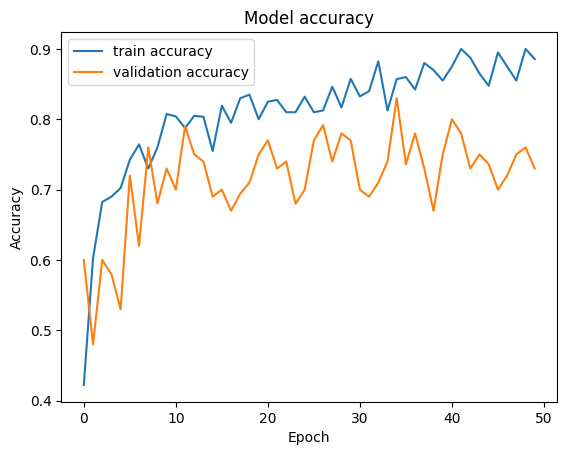

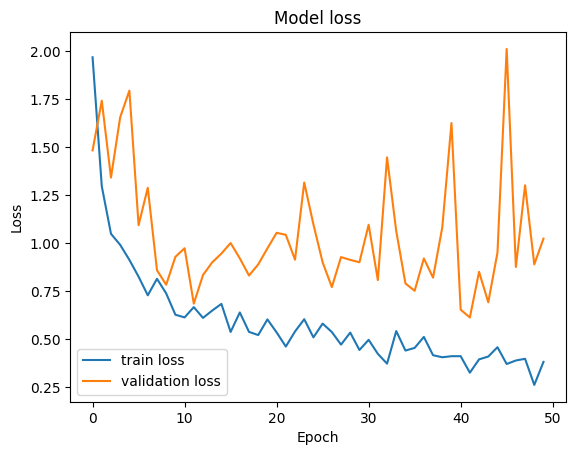

In [15]:
def plot_accuracy(history_mobileNet):
    plt.plot(history_mobileNet.history['accuracy'],label='train accuracy')
    plt.plot(history_mobileNet.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history_mobileNet):
    plt.plot(history_mobileNet.history['loss'],label="train loss")
    plt.plot(history_mobileNet.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history_mobileNet)
plot_loss(history_mobileNet)

InceptionV3

In [16]:
import tensorflow_hub as hub

mobilenet_v3 = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

feature_extractor_model = mobilenet_v3

feature_extractor_layer = hub.KerasLayer(feature_extractor_model,
                                        input_shape=(224, 224, 3),
                                        trainable=False,
                                        weights=None)

https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix